<a href="https://colab.research.google.com/github/Befezdow/ai_test/blob/master/data_playing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/Befezdow/ai_test/master/bank/bank.csv'
data = pd.read_csv(url, sep=';', header=0,  engine='python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [9]:
print(data)

      age            job   marital  education  ... pdays  previous poutcome    y
0      30     unemployed   married    primary  ...    -1         0  unknown   no
1      33       services   married  secondary  ...   339         4  failure   no
2      35     management    single   tertiary  ...   330         1  failure   no
3      30     management   married   tertiary  ...    -1         0  unknown   no
4      59    blue-collar   married  secondary  ...    -1         0  unknown   no
5      35     management    single   tertiary  ...   176         3  failure   no
6      36  self-employed   married   tertiary  ...   330         2    other   no
7      39     technician   married  secondary  ...    -1         0  unknown   no
8      41   entrepreneur   married   tertiary  ...    -1         0  unknown   no
9      43       services   married    primary  ...   147         2  failure   no
10     39       services   married  secondary  ...    -1         0  unknown   no
11     43         admin.   m

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [12]:
print(data.shape)
print(data.columns)

(4521, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [13]:
data.index

RangeIndex(start=0, stop=4521, step=1)

In [14]:
data.at[2, 'education']

'tertiary'

In [15]:
data['education']

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
5        tertiary
6        tertiary
7       secondary
8        tertiary
9         primary
10      secondary
11      secondary
12       tertiary
13      secondary
14      secondary
15       tertiary
16      secondary
17       tertiary
18        primary
19      secondary
20        unknown
21       tertiary
22      secondary
23      secondary
24       tertiary
25       tertiary
26        primary
27        unknown
28      secondary
29      secondary
          ...    
4491    secondary
4492    secondary
4493     tertiary
4494    secondary
4495     tertiary
4496    secondary
4497     tertiary
4498     tertiary
4499      primary
4500    secondary
4501     tertiary
4502    secondary
4503      primary
4504    secondary
4505    secondary
4506     tertiary
4507    secondary
4508      unknown
4509     tertiary
4510    secondary
4511    secondary
4512    secondary
4513    secondary
4514    secondary
4515    se

In [16]:
data['education'][3]

'tertiary'

In [22]:
data['education'].dtype.name

'object'

In [23]:
type(data['education'][3])

str

In [24]:
type(data['education'])

pandas.core.series.Series

In [26]:
data[['education', 'job']].head()

,education,job
0,primary,unemployed
1,secondary,services
2,tertiary,management
3,tertiary,management
4,secondary,blue-collar


In [27]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


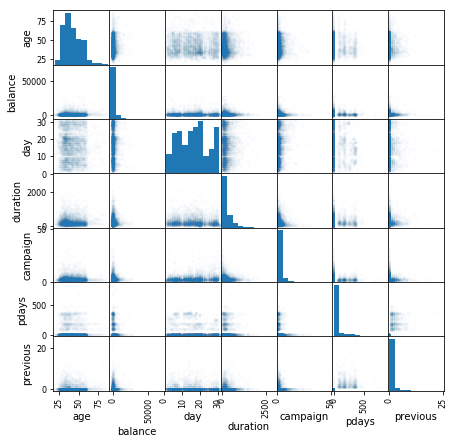

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (7, 7))
pass

In [30]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


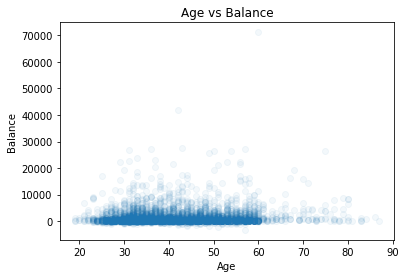

In [32]:
plt.plot(data['age'], data['balance'], 'o', alpha = 0.05)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs Balance')
pass

In [33]:
data['y'] == 'yes'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4491    False
4492    False
4493    False
4494     True
4495    False
4496    False
4497    False
4498    False
4499    False
4500    False
4501    False
4502    False
4503     True
4504     True
4505     True
4506    False
4507    False
4508    False
4509    False
4510    False
4511     True
4512    False
4513    False
4514    False
4515    False
4516    False
4517    False
4518    False
4519    False
4520    False
Name: y, Length: 4521, dtype: bool

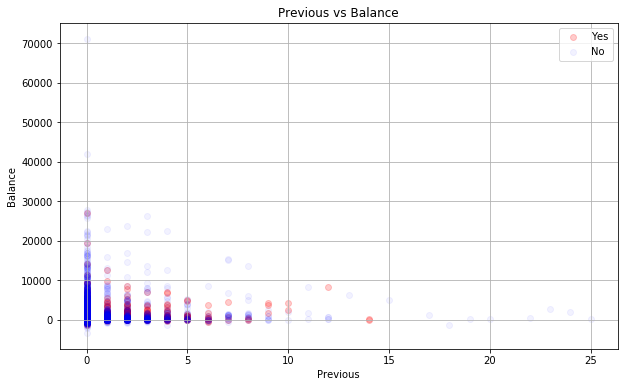

In [42]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['y'] == 'yes']['previous'],
            data[data['y'] == 'yes']['balance'],
            alpha = 0.2,
            label = 'Yes',
            color = 'r')

plt.scatter(data[data['y'] == 'no']['previous'],
            data[data['y'] == 'no']['balance'],
            alpha = 0.05,
            label = 'No',
            color = 'b')

plt.xlabel('Previous')
plt.ylabel('Balance')
plt.title('Previous vs Balance')
plt.legend()
plt.grid()

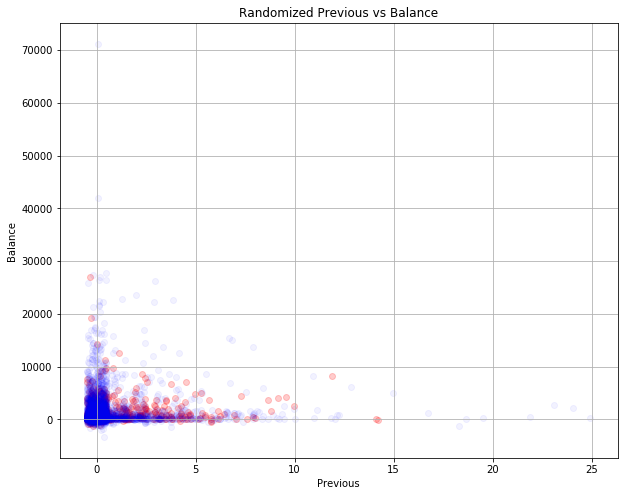

In [43]:
np.random.seed(0)
previous_rnd = data['previous'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(previous_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['balance'],
            alpha = 0.2,
            label = 'Yes',
            color = 'r')

plt.scatter(previous_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['balance'],
            alpha = 0.05,
            label = 'No',
            color = 'b')

plt.xlabel('Previous')
plt.ylabel('Balance')
plt.title('Randomized Previous vs Balance')
plt.grid()

In [44]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [45]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [46]:
data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [47]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [52]:
print(data[data['y'] == 'yes'].age.count())
print(data[data['y'] == 'no'].age.count())

521
4000
